In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# sys.path.append(Path().resolve().parent)
# sys.path.append(Path().resolve())
sys.path.append(os.path.join(Path().resolve(), 'DigiLeTs/scripts'))

In [2]:
from data import read_original_data

In [10]:
import cv2
import copy

def get_image_sequence(instance, size=256, line_width=3):
    
    img = np.zeros((size,size,1))
    
    images = []
    actions = []
    for i in range(len(instance) - 1):
        if instance[i][5] == 0 and instance[i+1][5] == 0:
            if instance[i+1][3] == 0:
                img = cv2.line(img=img,
                               pt1=(int(instance[i][0]*size),int((1-instance[i][1])*size)),
                               pt2=(int(instance[i+1][0]*size),int((1-instance[i+1][1])*size)),
                               color=1,
                               thickness=line_width,
                               lineType=cv2.LINE_AA,
                              )
                images.append(copy.deepcopy(img))
                action = (instance[i+1][0]-instance[i][0], instance[i+1][1]-instance[i][1])
                actions.append(action)
                
    images = np.array(images)
    actions = np.array(actions)[1:]
    rewards = np.zeros(len(actions))
    dones = np.zeros(len(actions))
    dones[-1] = 1
    return images, actions, rewards, dones


In [4]:
import glob
data_dir = "data/preprocessed/complete"
filenames = glob.glob(os.path.join(data_dir, '*_preprocessed'))

In [6]:
import os
os.path.basename(filename)

'111-m-28-right_2020-09-24-15-19-11_preprocessed'

In [16]:
import os
for idx in range(len(filenames)):
    filename = filenames[idx]
    basename = os.path.basename(filename)
    participant = read_original_data(filename)
    if idx < 70:
        save_folder = "train"
    else:
        save_folder = "validation"
    for s, symbol in enumerate(participant["trajectories"]):
        if s > 9:
            # 数字以外は省略
            break
        # dataset = dict(image=[], action=[], done=[])
        for i, _instance in enumerate(symbol):
            
            instance = _instance[:participant["lengths"][s, i]]
            images, actions, rewards, dones = get_image_sequence(instance, size=64, line_width=3)
            dataset = dict()
            dataset["image"] = images
            dataset["action"] = actions
            dataset["reward"] = rewards
            dataset["done"] = dones
            save_foldername = "{}/{}".format(save_folder, s)
            save_filename = "{}/{}_{}.npy".format(save_foldername, basename, i)
            print(save_filename)
            os.makedirs(save_foldername, exist_ok=True)
            np.save(save_filename, dataset)

Reading from: data/preprocessed/complete/002-f-22-right_2019-06-05-12-21-29_preprocessed
train/0/002-f-22-right_2019-06-05-12-21-29_preprocessed_0.npy
train/0/002-f-22-right_2019-06-05-12-21-29_preprocessed_1.npy
train/0/002-f-22-right_2019-06-05-12-21-29_preprocessed_2.npy
train/0/002-f-22-right_2019-06-05-12-21-29_preprocessed_3.npy
train/0/002-f-22-right_2019-06-05-12-21-29_preprocessed_4.npy
train/1/002-f-22-right_2019-06-05-12-21-29_preprocessed_0.npy
train/1/002-f-22-right_2019-06-05-12-21-29_preprocessed_1.npy
train/1/002-f-22-right_2019-06-05-12-21-29_preprocessed_2.npy
train/1/002-f-22-right_2019-06-05-12-21-29_preprocessed_3.npy
train/1/002-f-22-right_2019-06-05-12-21-29_preprocessed_4.npy
train/2/002-f-22-right_2019-06-05-12-21-29_preprocessed_0.npy
train/2/002-f-22-right_2019-06-05-12-21-29_preprocessed_1.npy
train/2/002-f-22-right_2019-06-05-12-21-29_preprocessed_2.npy
train/2/002-f-22-right_2019-06-05-12-21-29_preprocessed_3.npy
train/2/002-f-22-right_2019-06-05-12-21-29_

In [2]:
from data import read_data
from plot import plot

In [3]:
filename = "data/data.pickle"
data = read_data(filename)

Reading from: data/data.pickle


In [ ]:
# import cv2
# import copy

# def get_image_sequence(instance, size=256, line_width=3):

#     actions = []
#     for i in range(len(instance) - 1):
#         if instance[i][5] == 0 and instance[i+1][5] == 0:
#             if instance[i+1][3] == 0:
#                 action = (instance[i+1][0]-instance[i][0], instance[i+1][1]-instance[i][1])
#                 actions.append(action)

#     img = np.zeros((size,size,1))
    
#     images = [img]
#     dones = []
#     for t in range(len(actions)):
#         img = cv2.line(img=img,
#                        pt1=(int(instance[i][0]*size),int((1-instance[i][1])*size)),
#                        pt2=(int(instance[i+1][0]*size),int((1-instance[i+1][1])*size)),
#                        color=1,
#                        thickness=line_width,
#                        lineType=cv2.LINE_AA,
#                       )
#         images.append(copy.deepcopy(img))
#         dones.append(0)
#     dones[-1] = 1
#     return np.array(images), np.array(actions), np.array(dones)


In [6]:
import cv2
import copy

def get_image_sequence(instance, size=256, line_width=3):
    
    img = np.zeros((size,size,1))
    
    images = []
    actions = []
    dones = []
    for i in range(len(instance) - 1):
        if instance[i][5] == 0 and instance[i+1][5] == 0:
            if instance[i+1][3] == 0:
                img = cv2.line(img=img,
                               pt1=(int(instance[i][0]*size),int((1-instance[i][1])*size)),
                               pt2=(int(instance[i+1][0]*size),int((1-instance[i+1][1])*size)),
                               color=1,
                               thickness=line_width,
                               lineType=cv2.LINE_AA,
                              )
                images.append(copy.deepcopy(img))
                action = (instance[i+1][0]-instance[i][0], instance[i+1][1]-instance[i][1])
                actions.append(action)
                dones.append(0)
    dones[-1] = 1
    return np.array(images), np.array(actions)[1:], np.array(dones)


In [7]:
from tqdm import tqdm
dataset = dict()
for i in range(10):
    dataset[i] = dict(image=[], action=[], done=[])
for p, participant in tqdm(enumerate(data)):
    for s, symbol in enumerate(participant["trajectories"]):
        if s > 9:
            # 数字以外は省略
            break
        for i, _instance in enumerate(symbol):
            instance = _instance[:participant["lengths"][s, i]]
            images, actions, dones = get_image_sequence(instance, size=64, line_width=3)
            dataset[s]["image"].append(images)
            dataset[s]["action"].append(actions)
            dataset[s]["done"].append(dones)

77it [00:03, 21.55it/s]


In [ ]:
images, actions, dones = get_image_sequence(instance, size=64, line_width=3)
plt.imshow(images[-1], cmap="gray")

In [10]:
len(dataset[0]["image"])

385

In [35]:
n_train = 350

for key_num in dataset.keys():
    train_data = dict()
    validataion_data = dict()
    for key_data in dataset[key_num].keys():
        print(key_num, key_data)
        train_data[key_data] = np.concatenate(dataset[key_num][key_data][:n_train], axis=0)
        validataion_data[key_data] = np.concatenate(dataset[key_num][key_data][n_train:], axis=0)

0 image
0 action
0 done
1 image
1 action
1 done
2 image
2 action
2 done
3 image
3 action
3 done
4 image
4 action
4 done
5 image
5 action
5 done
6 image
6 action
6 done
7 image
7 action
7 done
8 image
8 action
8 done
9 image
9 action
9 done


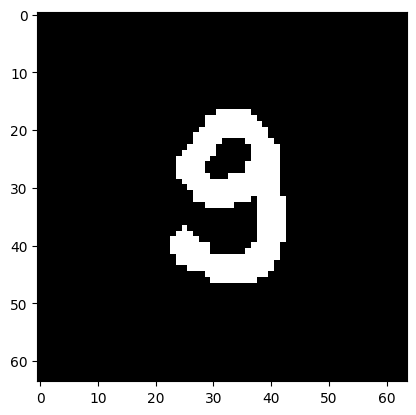

In [9]:
img = dataset[9]["image"][60][-1]
plt.imshow(img, cmap="gray")

In [37]:
img.shape

(76, 64, 64, 1)

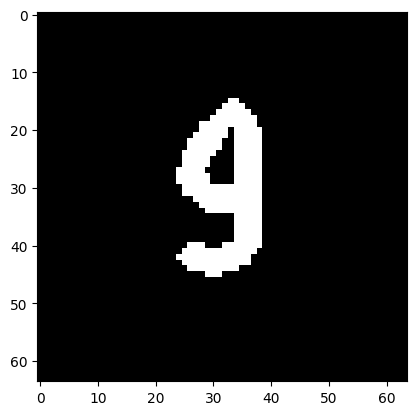

Reading from: data/data.pickle


TypeError: list indices must be integers or slices, not str

<Figure size 640x480 with 0 Axes>

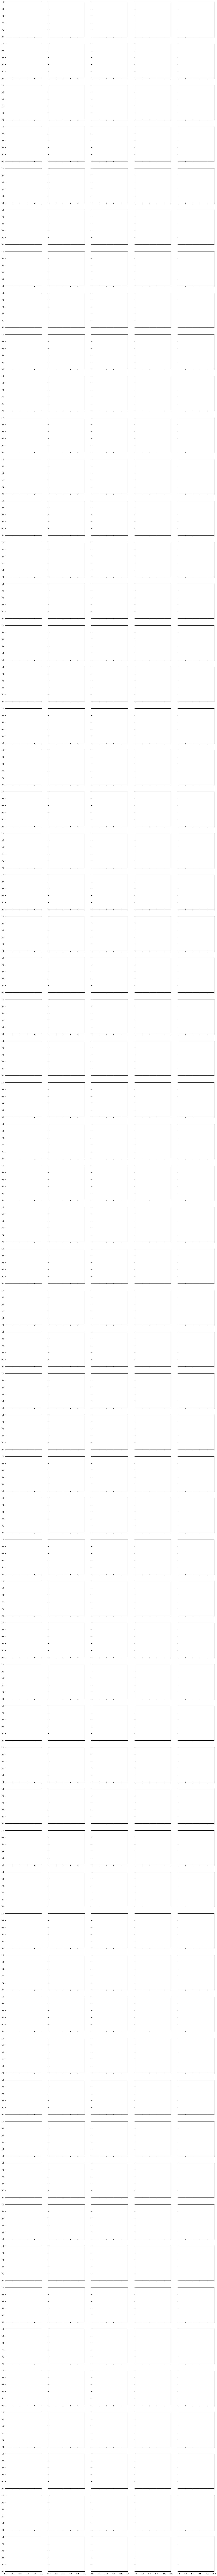

In [3]:
# filenames = ["data/preprocessed/complete/002-f-22-right_2019-06-05-12-21-29_preprocessed.pickle"]
filenames = ["data/data.pickle"]
for filename in filenames:
    participant = read_data(filename)
    plot(participant)
    filename = os.path.splitext(filename)[0] + ".png"
    print("Writing to: " + filename)
    plt.savefig(filename)

In [7]:
participant["trajectories"].shape

(62, 5, 250, 8)

In [12]:
for s, symbol in enumerate(participant["trajectories"]):
        for i, _instance in enumerate(symbol):
            print(_instance[:participant["lengths"][s, i]].shape)
            instance = _instance[:participant["lengths"][s, i]]
            break
        break

(77, 8)


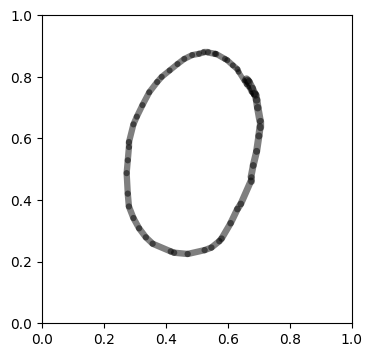

In [17]:
nrows = 1
ncols = 1
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 4*nrows), sharex=True, sharey=True)

for i in range(len(instance) - 1):
    if instance[i][5] == 0 and instance[i+1][5] == 0:
        if instance[i+1][3] == 0:
            color = "black"
        elif instance[i+1][3] == 1:
            color = "yellow"
    else:
        color = "magenta"
    axs.plot([instance[i][0], instance[i+1][0]],
            [instance[i][1], instance[i+1][1]],
            linewidth=instance[i][2]*10,
            solid_capstyle="round",
            color=color,
            alpha=0.5)
axs.set_xlim(0,1)
axs.set_ylim(0,1)
plt.show()

In [59]:
img = np.zeros((3,64,64))
img = np.zeros((64,64,3))

In [60]:
img.shape

(64, 64, 3)

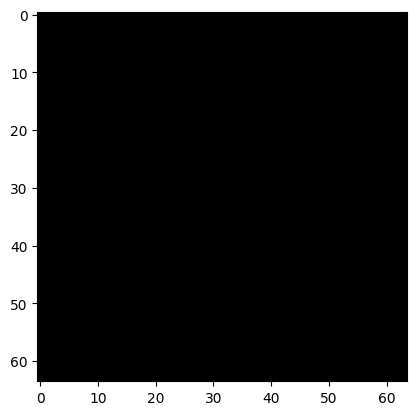

In [61]:
# plt.imshow(img.transpose(1,2,0), cmap = "gray")
plt.imshow(img)

In [62]:
import cv2

In [65]:
for s, symbol in enumerate(participant["trajectories"]):
        for i, _instance in enumerate(symbol):
            print(_instance[:participant["lengths"][s, i]].shape)
            instance = _instance[:participant["lengths"][s, i]]
            break
        break


In [85]:
s,i = 5,0
instance = participant["trajectories"][s,i][:participant["lengths"][s, i]]

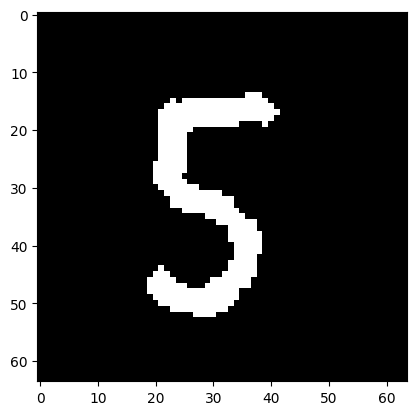

In [103]:
import copy
line_width = 3
images = []
img = np.zeros((64,64,1))
for i in range(len(instance) - 1):
    if instance[i][5] == 0 and instance[i+1][5] == 0:
        if instance[i+1][3] == 0:
            img = cv2.line(img=img,
                           pt1=(int(instance[i][0]*64),int((1-instance[i][1])*64)),
                           pt2=(int(instance[i+1][0]*64),int((1-instance[i+1][1])*64)),
                           color=1,
                           thickness=line_width,
                           lineType=cv2.LINE_AA,
                          )
            images.append(copy.deepcopy(img))
plt.imshow(img, cmap="gray")  

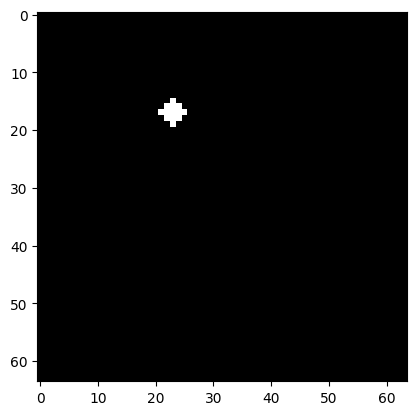

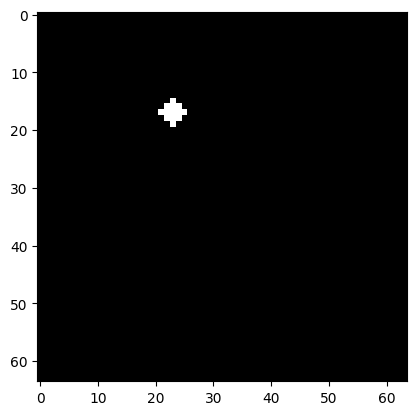

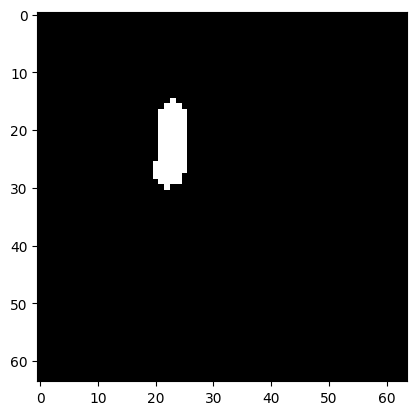

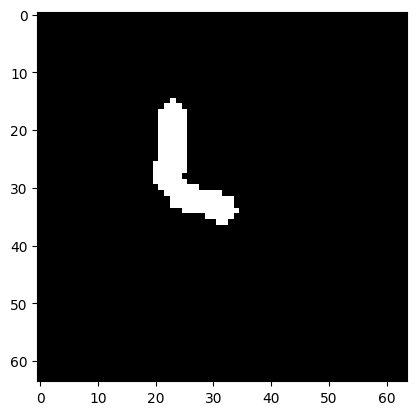

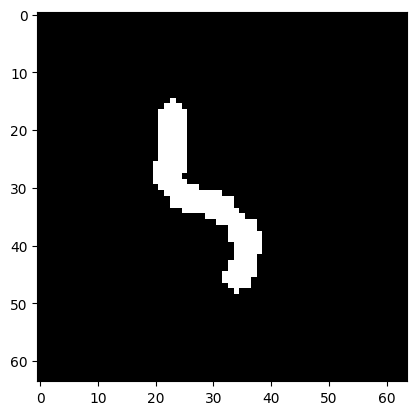

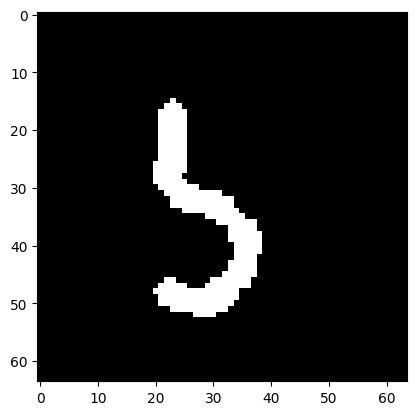

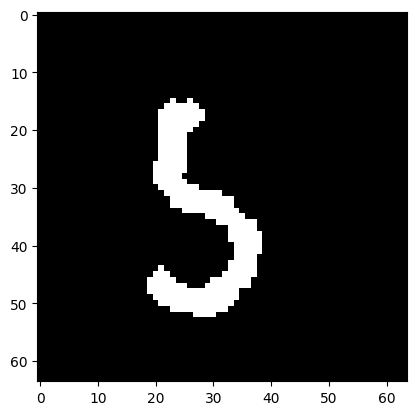

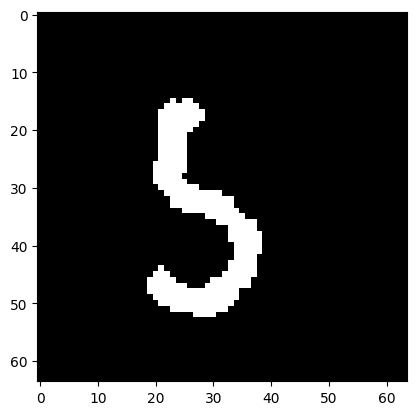

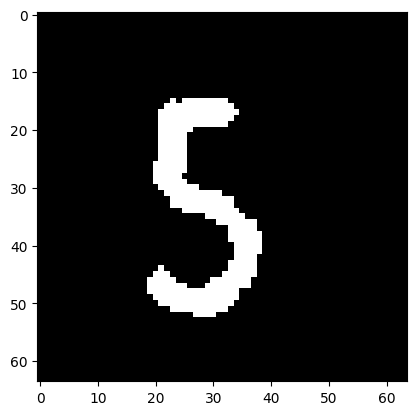

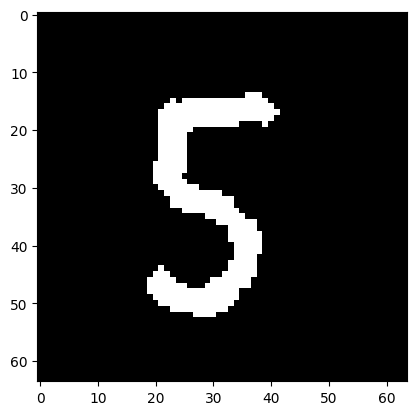

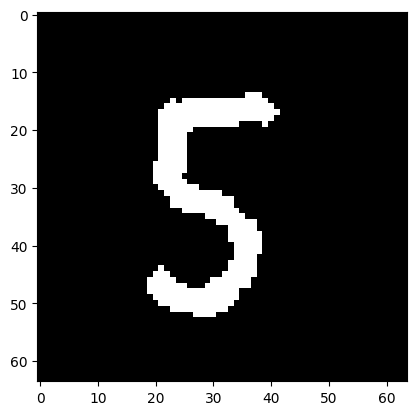

In [105]:
for i in range(0,len(images),5):
    plt.imshow(images[i], cmap="gray")
    plt.show()
plt.imshow(images[-1], cmap="gray")
plt.show()